본 ipynb 파일은 초기 제공 코드를 한국어 주석만 추가하고 분석한 파일로, 원본 파일이 더 자세히 적혀있고 의역이 있을 수 있다.

원본 파일 : ch2_nb1_mnist_keras.ipynb

In [ ]:
import tensorflow as tf # 텐서플로 임포트

## Input data

In [ ]:
num_classes = 10 # 클래스 개수 (0~9)
img_rows, img_cols = 28, 28 # 이미지 사이즈(가로, 세로 )
num_channels = 1 # 흑백
input_shape = (img_rows, img_cols, num_channels)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 값 정규화(0~1사이)

## Building a simple model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())# Flatten() : 2차원 배열(이미지) --> 1차원 배열로 전환 = 28*28 --> 784
model.add(tf.keras.layers.Dense(128, activation='relu')) # Output 크기가 128인 Dense layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # Output 크기(Num_classes)10인 Dense layer

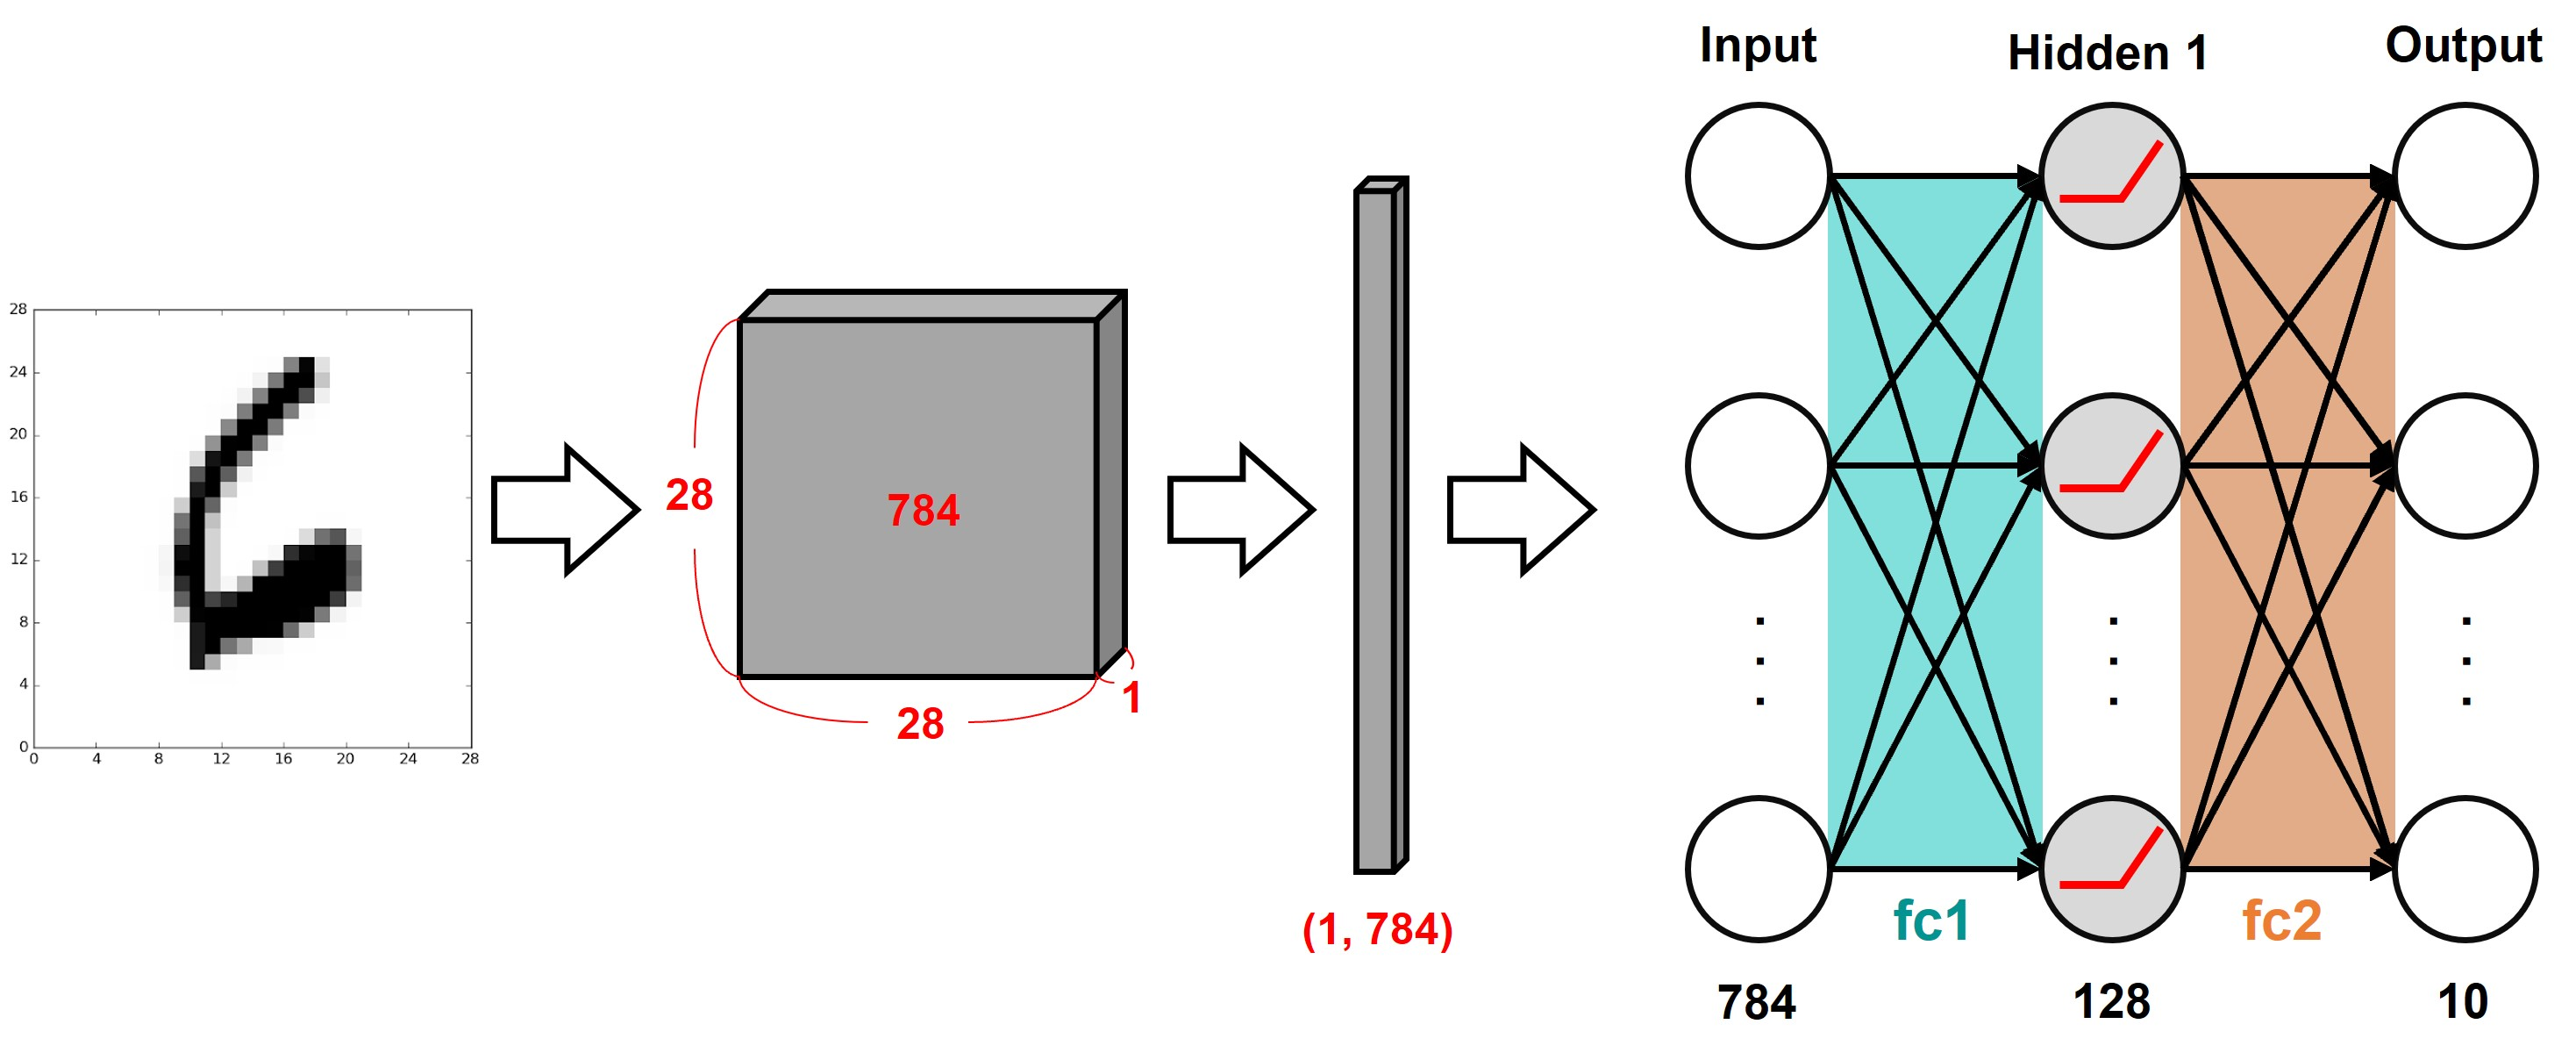

## Launch training

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [tf.keras.callbacks.TensorBoard('./keras')]
model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6397 - accuracy: 0.8418 - val_loss: 0.3560 - val_accuracy: 0.9042
Epoch 2/25
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3369 - accuracy: 0.9059 - val_loss: 0.2958 - val_accuracy: 0.9187
Epoch 3/25
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2899 - accuracy: 0.9183 - val_loss: 0.2651 - val_accuracy: 0.9241
Epoch 4/25
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2603 - accuracy: 0.9262 - val_loss: 0.2417 - val_accuracy: 0.9316
Epoch 5/25
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2378 - accuracy: 0.9330 - val_loss: 0.2222 - val_accuracy: 0.9359
Epoch 6/25
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2192 - accuracy: 0.9384 - val_loss: 0.2074 - val_accuracy: 0.9405
Epoch 7/25
60000/60000 [==============================] 

## Running with an estimator

In [ ]:
estimator = tf.keras.estimator.model_to_estimator(model, model_dir='./estimator_dir')

W0429 13:04:31.959720 140496034522880 keras.py:460] You are creating an Estimator from a Keras model manually subclassed from `Model`, that was already called on some inputs (and thus already had weights). We are currently unable to preserve the model's state (its weights) as part of the estimator in this case. Be warned that the estimator has been created using a freshly initialized version of your model.
Note that this doesn't affect the state of the model instance you passed as `keras_model` argument.


In [ ]:
BATCH_SIZE = 32
def train_input_fn():
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
    return train_dataset

estimator.train(train_input_fn, steps=len(x_train)//BATCH_SIZE)